# Exploratory Data Analysis (EDA) and Business Insights

## Importing the required libraries for EDA

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

## Loading the data into the data frame

In [129]:
# File paths
customers_file = '/content/Customers.csv'
products_file = '/content/Products.csv'
transactions_file = '/content/Transactions.csv'

# Loading datasets
customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)

print("Customers Dataset:")
display(customers_df.head())

print("\nProducts Dataset:")
display(products_df.head())

print("\nTransactions Dataset:")
display(transactions_df.head())

Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [130]:
# Convert date columns to datetime format
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])

# Verify TotalValue consistency i.e. TotalValue should be equal to Price * Quantity
transactions_df["CalculatedTotal"] = transactions_df["Price"] * transactions_df["Quantity"]
total_value_mismatch = transactions_df[transactions_df["TotalValue"] != transactions_df["CalculatedTotal"]]

# Check for duplicate records
customers_duplicates = customers_df.duplicated().sum()
products_duplicates = products_df.duplicated().sum()
transactions_duplicates = transactions_df.duplicated().sum()

# Check for duplicate IDs
customer_id_duplicates = customers_df["CustomerID"].duplicated().sum()
product_id_duplicates = products_df["ProductID"].duplicated().sum()
transaction_id_duplicates = transactions_df["TransactionID"].duplicated().sum()

{
    "Total Value Mismatch Count": total_value_mismatch.shape[0],
    "Duplicate Rows": {
        "Customers": customers_duplicates,
        "Products": products_duplicates,
        "Transactions": transactions_duplicates,
    },
    "Duplicate IDs": {
        "Customers": customer_id_duplicates,
        "Products": product_id_duplicates,
        "Transactions": transaction_id_duplicates,
    },
}


{'Total Value Mismatch Count': 88,
 'Duplicate Rows': {'Customers': 0, 'Products': 0, 'Transactions': 0},
 'Duplicate IDs': {'Customers': 0, 'Products': 0, 'Transactions': 0}}

In [131]:
mismatched_transactions = transactions_df[transactions_df["TotalValue"] != transactions_df["CalculatedTotal"]]
print(mismatched_transactions)

    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
17         T00270      C0101      P034 2024-11-07 02:48:08         3   
29         T00218      C0148      P057 2024-01-17 19:40:55         3   
30         T00417      C0035      P057 2024-04-20 22:54:54         3   
31         T00492      C0120      P057 2024-08-08 05:40:02         3   
35         T00703      C0092      P057 2024-02-04 00:31:54         3   
..            ...        ...       ...                 ...       ...   
924        T00823      C0095      P079 2024-09-30 10:45:06         3   
935        T00660      C0057      P008 2024-09-23 16:46:01         3   
946        T00646      C0036      P091 2024-01-23 12:53:51         3   
947        T00793      C0054      P091 2024-10-07 17:48:28         3   
948        T00798      C0015      P091 2024-09-21 01:39:03         3   

     TotalValue   Price  CalculatedTotal  
17       651.15  217.05           651.15  
29       719.10  239.70           719.10  
30    

In [132]:
transactions_df.loc[transactions_df["TotalValue"] != transactions_df["CalculatedTotal"], "TotalValue"] = transactions_df["CalculatedTotal"]


In [133]:
transactions_customers = pd.merge(transactions_df, customers_df, on="CustomerID", how="left")
full_data = pd.merge(transactions_customers, products_df, on="ProductID", how="left")
full_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CalculatedTotal,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [134]:
full_data = full_data.drop(columns=['Price_y']).rename(columns={"Price_x": "ProductPrice"})

In [135]:
full_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,ProductPrice,CalculatedTotal,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [136]:
missing_values = full_data.isnull().sum()
missing_values

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
ProductPrice,0
CalculatedTotal,0
CustomerName,0
Region,0


In [137]:
full_data.shape

(1000, 13)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Recency' 'Frequency']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


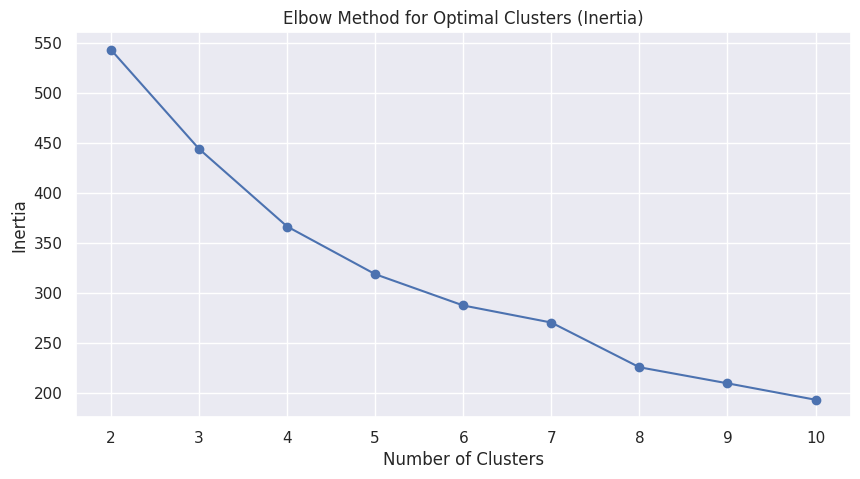

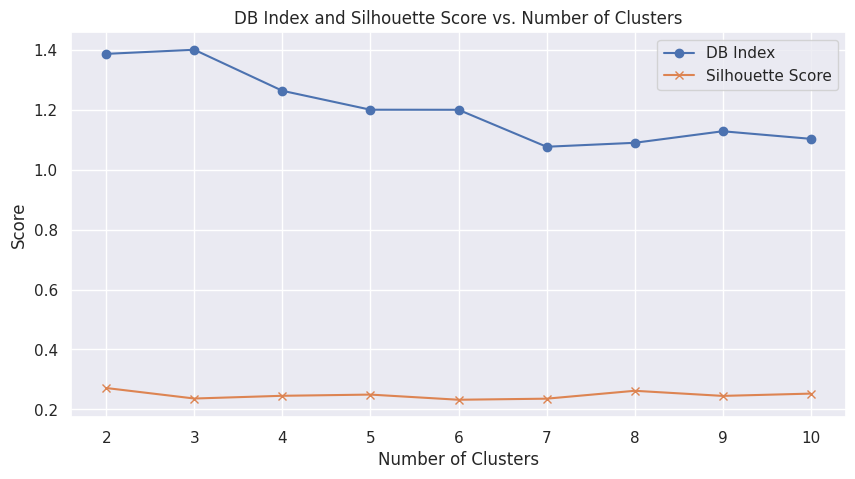

Davies-Bouldin Index: 1.3997182156228598
Silhouette Score: 0.23639115252195725
Calinski-Harabasz Index: 76.35440006442836


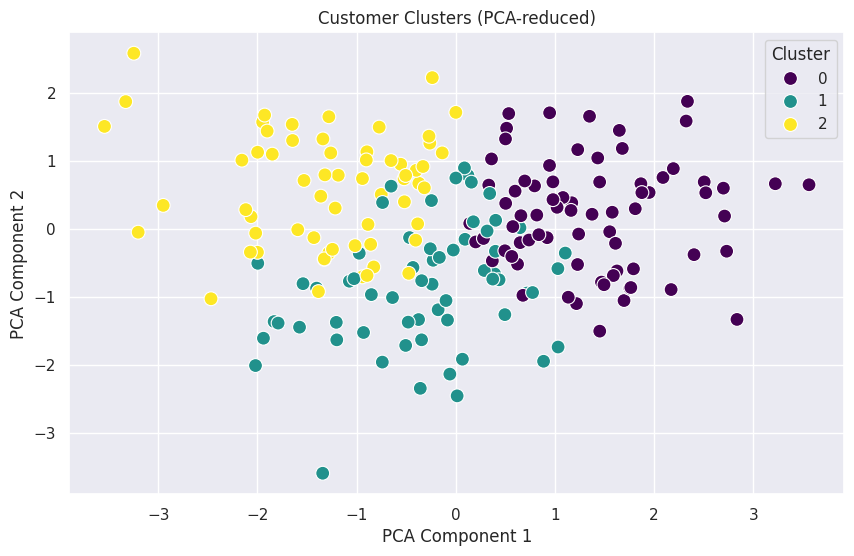

Cluster Centroids (scaled back to original features):
[[5.14642822e+03 7.17808219e+00 2.78156865e+02 1.71232877e+00]
 [2.99720270e+03 3.74603175e+00 3.29897275e+02 1.42857143e+00]
 [1.85175258e+03 3.70967742e+00 2.03295867e+02 1.66129032e+00]]


In [138]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Step 1: Aggregating customer data
customer_data = full_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',         # Total spending
    'TransactionID': 'count',    # Number of transactions
    'ProductPrice': 'mean',      # Average transaction value
}).rename(columns={
    'TransactionID': 'NumTransactions',
    'ProductPrice': 'AvgTransactionValue'
})

# Add profile information (Region)
customer_profiles = full_data[['CustomerID', 'Region']].drop_duplicates()
customer_data = customer_data.merge(customer_profiles, on='CustomerID')

# Step 2: Calculate Recency (days since last transaction)
customer_data['Recency'] = (pd.to_datetime('today') - pd.to_datetime(full_data.groupby('CustomerID')['TransactionDate'].max())).dt.days

# Step 3: Frequency: Number of distinct transaction days
customer_data['Frequency'] = full_data.groupby('CustomerID')['TransactionDate'].nunique()

# Step 4: Handle Outliers using IQR method (Optional)
Q1 = customer_data['TotalValue'].quantile(0.25)
Q3 = customer_data['TotalValue'].quantile(0.75)
IQR = Q3 - Q1
customer_data = customer_data[(customer_data['TotalValue'] >= (Q1 - 1.5 * IQR)) & (customer_data['TotalValue'] <= (Q3 + 1.5 * IQR))]

# Step 5: Encode Categorical Data (Region)
le = LabelEncoder()
customer_data['Region'] = le.fit_transform(customer_data['Region'])

# Step 6: Handle missing values using imputation (if any)
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(customer_data.drop(columns=['CustomerID']))

# Step 7: Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_features)

# Step 8: Optimal Cluster Selection using Elbow Method
inertia = []
db_scores = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(scaled_features, kmeans.labels_))
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot Elbow Method for Inertia
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot DB Index and Silhouette Scores for each K
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), db_scores, marker='o', label='DB Index')
plt.plot(range(2, 11), silhouette_scores, marker='x', label='Silhouette Score')
plt.title('DB Index and Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# Step 9: Apply KMeans with Optimal Number of Clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Step 10: Add cluster labels to the dataset
customer_data['Cluster'] = kmeans_labels

# Step 11: Evaluate Clustering
db_index = davies_bouldin_score(scaled_features, kmeans_labels)
silhouette_avg = silhouette_score(scaled_features, kmeans_labels)
calinski_harabasz = calinski_harabasz_score(scaled_features, kmeans_labels)

print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

# Step 12: Visualize Clusters using PCA (2D projection)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title('Customer Clusters (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Optional: Analyze cluster centroids to understand characteristics
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print(f'Cluster Centroids (scaled back to original features):\n{centroids}')

# Step 13: Save clustering results to CSV
final_cluster_data = customer_data[['CustomerID', 'TotalValue', 'NumTransactions', 'AvgTransactionValue', 'Recency', 'Frequency', 'Region', 'Cluster']]
final_cluster_data.to_csv('customer_clusters.csv', index=False)
